# Project Title : Loan Eligibility Prediction Using Machine Learning

#### Problem Statement : A Company wants to automate the loan eligibility process based on customer detail provided while filling online application form. Our goal is to predict if applicant is eligible for loan or not. Hence the more accurate below program is in predicting the eligible customers , the more beneficial it would be for the Company.

# Program :

# **Importing the Dataset**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Reading the Dataset**

In [3]:
l = pd.read_csv("train.csv")
l

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#drop unwanted columns

In [5]:
l.drop("Loan_ID", inplace=True , axis=1)
l.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **EDA**

In [6]:
#To Visualize Loan Status proportion

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

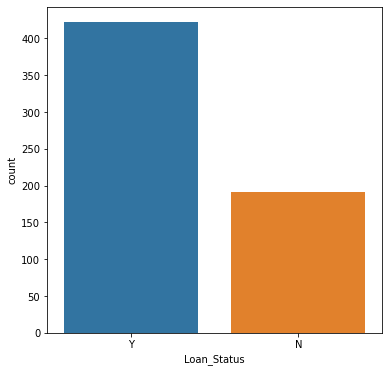

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(data=l,x="Loan_Status")

In [8]:
#Now we will visualize each Independent Variable Seperately

**Independent Variable (Categorical)**

In [9]:
#1.Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

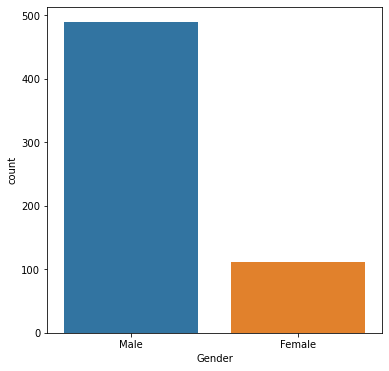

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(data=l,x="Gender")

In [11]:
#From above plot it can be seen that for Loan Application , Male candidates are more as compared to Female candidates.

In [12]:
#2.Married

<AxesSubplot:xlabel='Married', ylabel='count'>

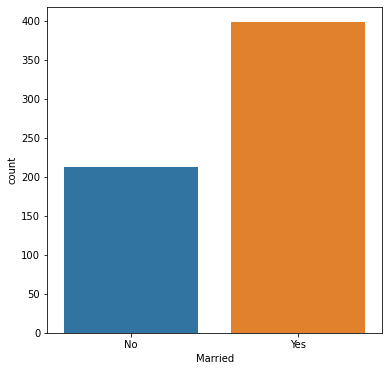

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(data=l,x="Married")

From above plot it can be seen that for Loan Application , Married candidates are more as compared to Unmarried candidates.

In [14]:
#3.Self Employed

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

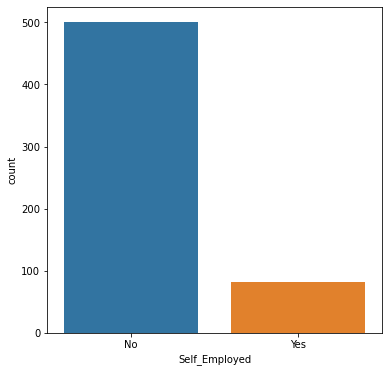

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(data=l,x="Self_Employed")

From above plot it can be seen that for Loan Application , Self Employed candidates are less.

In [16]:
#4.Credit_History

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

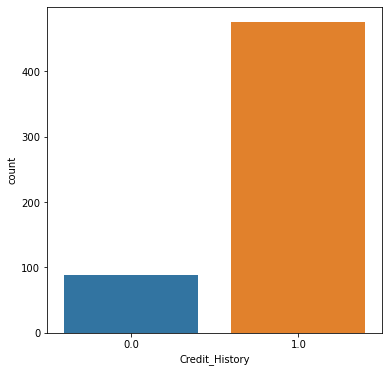

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(data=l,x="Credit_History")

From above plot it can be seen that most of applicants have repaid their debts

**Independent Variable (Ordinal)**

In [18]:
#1.Dependents

<AxesSubplot:xlabel='Dependents', ylabel='count'>

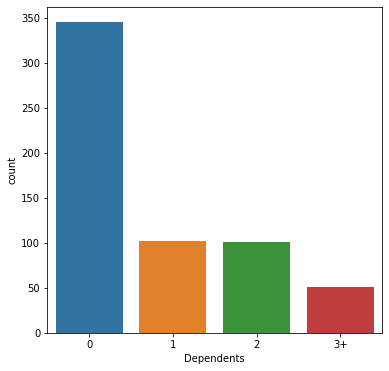

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(data=l,x="Dependents")

From above plot it is clear that independent candidates are more for Loan Application

In [20]:
#2.Education

<AxesSubplot:xlabel='Education', ylabel='count'>

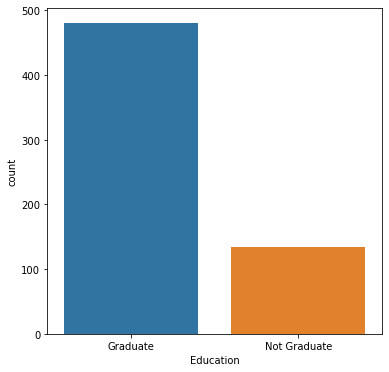

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(data=l,x="Education")

From above plot it is clear that Graduate candidates are more for Loan Application

In [22]:
#3.Property Area

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

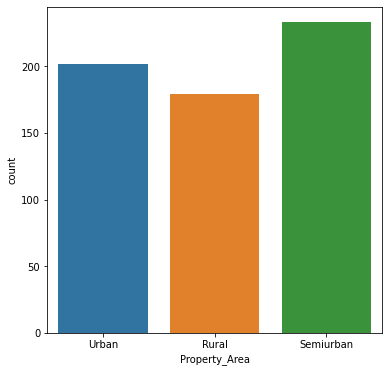

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(data=l,x="Property_Area")

**Independent Variable (Numerical)**

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

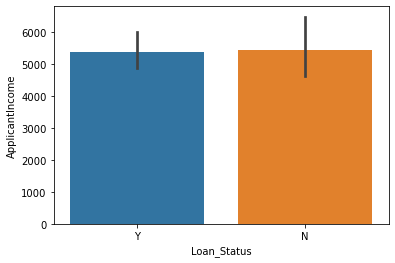

In [24]:
sns.barplot(x="Loan_Status", y="ApplicantIncome", data=l)

From above plot it can be noted that for some Applicants are eligible as per their Income while some are not eligible

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

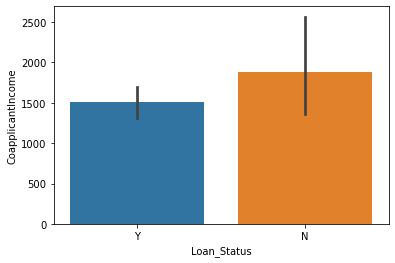

In [25]:
sns.barplot(x="Loan_Status", y="CoapplicantIncome", data=l)

From above plot it can be noted that some Coapplicants Income was Eligible for Loan Approval.

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

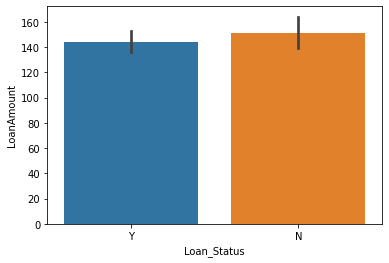

In [26]:
sns.barplot(x="Loan_Status", y="LoanAmount", data=l)

From above plot it can be noted that most Applicants as per their Loan Amount are not eligible for Loan

# **PREPROCESSING**

In [27]:
l.shape

(614, 12)

In [28]:
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


From above it can be noted that there are Missing Values in the Dataset

**Handling Missing Data**

In [29]:
#1.Numerical Columns

In [30]:
l['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [31]:
l['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [32]:
l['Credit_History'].unique()

array([ 1.,  0., nan])

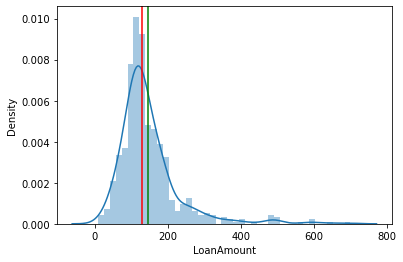

In [33]:
#checking whether data is normally distributed
sns.distplot(l['LoanAmount'])
plt.axvline(l['LoanAmount'].mean() , color="green")
plt.axvline(l['LoanAmount'].median() , color="red")

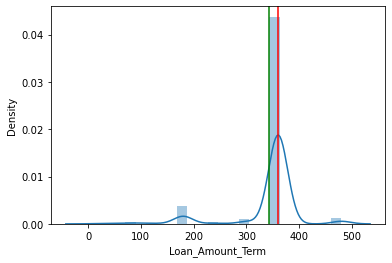

In [34]:
sns.distplot(l['Loan_Amount_Term'])
plt.axvline(l['Loan_Amount_Term'].mean() , color="green")
plt.axvline(l['Loan_Amount_Term'].median() , color="red")

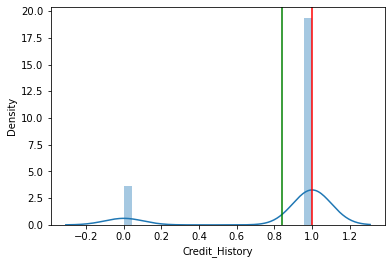

In [35]:
sns.distplot(l['Credit_History'])
plt.axvline(l['Credit_History'].mean() , color="green")
plt.axvline(l['Credit_History'].median() , color="red")

In [36]:
#from above distplots we can note that data is not normally distributed , so we will replace missing values by 'median'

In [37]:
l['LoanAmount'].fillna(l['LoanAmount'].median(),inplace=True)
l['Loan_Amount_Term'].fillna(l['Loan_Amount_Term'].median(),inplace=True)
l['Credit_History'].fillna(l['Credit_History'].median(),inplace=True)

In [38]:
#to check whether nan values are removed
l['LoanAmount'].unique()

array([128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70., 109.,
       200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315., 116.,
       112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320., 144.,
       184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97., 135.,
       180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187., 113.,
       176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,  25.,
       137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,  85.,
       259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242., 129.,
        30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87., 101.,
       495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,  90.,
       166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,  42.,
       280., 140., 155., 123., 279., 192., 304., 330., 150., 207., 436.,
        78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300., 376.,
       117.,  71., 490., 173.,  46., 228., 308., 23

In [39]:
l['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [40]:
l['Credit_History'].unique()

array([1., 0.])

In [41]:
#2.Categorical Columns

In [42]:
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [43]:
l['Gender'] = l['Gender'].fillna(l['Gender'].mode()[0])
l['Married'] = l['Married'].fillna(l['Married'].mode()[0])
l['Dependents'] = l['Dependents'].fillna(l['Dependents'].mode()[0])
l['Self_Employed'] = l['Self_Employed'].fillna(l['Self_Employed'].mode()[0])

In [44]:
#to check whether missing values are being removed
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


As data is proper so all missing values are being removed

**Handling Categorical data**

In [45]:
l_cat = l.select_dtypes(object)
l_num = l.select_dtypes(['float64' , 'int64'])

In [46]:
l_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [47]:
l_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [48]:
from sklearn.preprocessing import LabelEncoder
for col in l_cat:
  le = LabelEncoder()
  l_cat[col] = le.fit_transform(l_cat[col])
l_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


All categorical data is transformed to numerical data

In [49]:
#concating the dataframes of catagorical & numerical to form a new dataframe

In [50]:
l_new = pd.concat([l_num , l_cat] , axis=1)
l_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,2,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1


To Detect Outliers

ApplicantIncome = 6.523526250899361


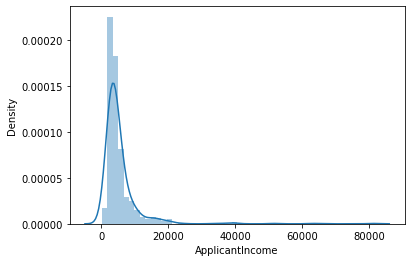

-------------------------------------------------------------------------------
CoapplicantIncome = 7.473216996340462


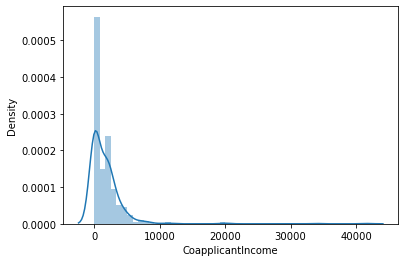

-------------------------------------------------------------------------------
LoanAmount = 2.736346927149759


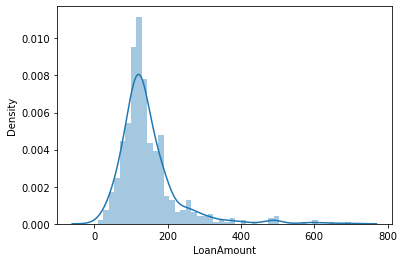

-------------------------------------------------------------------------------
Loan_Amount_Term = -2.396239917101247


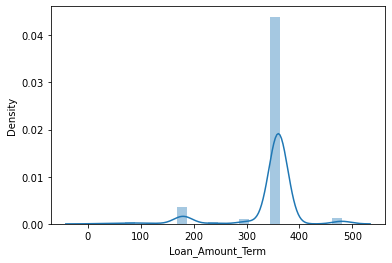

-------------------------------------------------------------------------------
Credit_History = -2.0170275689782207


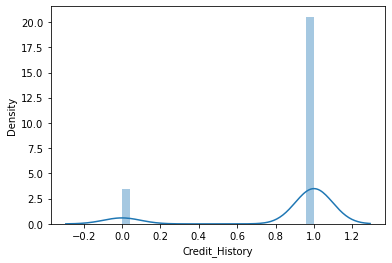

-------------------------------------------------------------------------------


In [51]:
from scipy.stats import skew
for col in l_num:
  print(f"{col} = {skew(l_num[col])}")
  sns.distplot(l_num[col])
  plt.show()
  print("-------------------------------------------------------------------------------")

In [52]:
#from above we can detect skewness in the data as follows :
#1.ApplicantIncome = 6.523526250899361 : positive skewness
#2.CoapplicantIncome = 7.473216996340462 : positive skewness
#3.LoanAmount = 2.736346927149759 : positive skewness
#4.Loan_Amount_Term = -2.396239917101247 : negative skewness
#5.Credit_History = -2.0170275689782207 : negative skewness

In [53]:
#checking correlation of target with the skewed columns

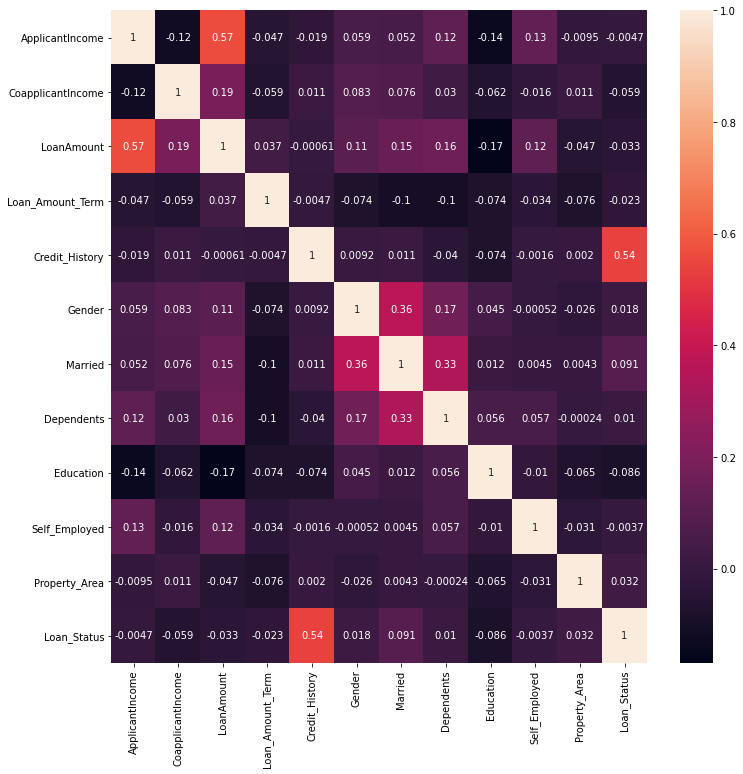

In [54]:
plt.figure(figsize=(12,12))
sns.heatmap(l_new.corr(),annot=True)
plt.show()

In [55]:
#from heatmap we can understand that there is no correlation between target and ApplicantIncome , CoapplicantIncome , LoanAmount , Loan_Amount_Term 
#as there is no correlation we will remove skewness from these columns

In [56]:
#to reduce skewness in 'ApplicantIncome' column

In [57]:
#to find minimum values
min(l_new["ApplicantIncome"])

150

In [58]:
#to reduce the value
skew(np.log(l_new["ApplicantIncome"]))

0.47840756970181564

In [59]:
l_new["ApplicantIncome"]=np.log(l_new["ApplicantIncome"])

0.47840756970181564


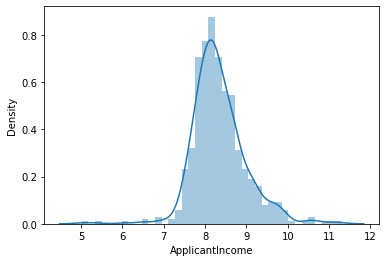

In [60]:
print(skew(l_new["ApplicantIncome"]))
sns.distplot(l_new["ApplicantIncome"])
plt.show()

In [61]:
#to reduce skewness in 'CoapplicantIncome' column

In [62]:
#to find minimum values
min(l_new["CoapplicantIncome"])

0.0

In [63]:
#as minimum value in the column is zero so we will not reduce its skewness

In [64]:
#to reduce skewness in 'LoanAmount' column

In [65]:
#to find minimum values
min(l_new["LoanAmount"])

9.0

In [66]:
#to reduce the value
skew(np.log(l_new["LoanAmount"]))

-0.19487771381643657

In [67]:
l_new["LoanAmount"]=np.log(l_new["LoanAmount"])

-0.19487771381643657


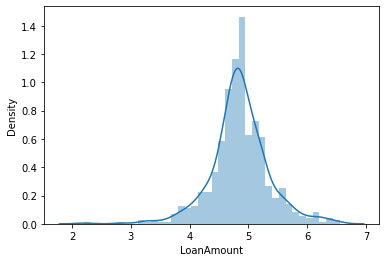

In [68]:
print(skew(l_new["LoanAmount"]))
sns.distplot(l_new["LoanAmount"])
plt.show()

In [69]:
#to reduce skewness in 'Loan_Amount_Term' column

In [70]:
min(l_new["Loan_Amount_Term"])

12.0

In [71]:
#as this column has negative skewness so we will increase the number

In [72]:
skew(np.power(l_new["Loan_Amount_Term"] , 3))

0.3570135776420391

In [73]:
l_new["Loan_Amount_Term"]=np.power(l_new["Loan_Amount_Term"] , 3)

0.3570135776420391


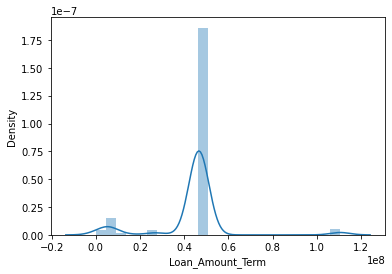

In [74]:
print(skew(l_new["Loan_Amount_Term"]))
sns.distplot(l_new["Loan_Amount_Term"])
plt.show()

In [75]:
#hence now all data is skewed i.e. outliers are being removed

**Feature Engineering**

In [76]:
#generating new column from existing column

In [77]:
l_new['Total_Income']=l_new['ApplicantIncome']+l_new['CoapplicantIncome']  

In [78]:
l_new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Total_Income
0,8.674026,0.0,4.852030,46656000.0,1.0,1,0,0,0,0,2,1,8.674026
1,8.430109,1508.0,4.852030,46656000.0,1.0,1,1,1,0,0,0,0,1516.430109
2,8.006368,0.0,4.189655,46656000.0,1.0,1,1,0,0,1,2,1,8.006368
3,7.856707,2358.0,4.787492,46656000.0,1.0,1,1,0,1,0,2,1,2365.856707
4,8.699515,0.0,4.948760,46656000.0,1.0,1,0,0,0,0,2,1,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7.972466,0.0,4.262680,46656000.0,1.0,0,0,0,0,0,0,1,7.972466
610,8.320205,0.0,3.688879,5832000.0,1.0,1,1,3,0,0,0,1,8.320205
611,8.996157,240.0,5.533389,46656000.0,1.0,1,1,1,0,0,2,1,248.996157
612,8.933664,0.0,5.231109,46656000.0,1.0,1,1,2,0,0,2,1,8.933664


In [79]:
#as we have generated new column so we will delete other two columns i.eApplicantIncome & CoapplicantIncome as they will be highly correlated to new created column

In [80]:
x = l_new.drop(['Loan_Status' , 'ApplicantIncome' , 'CoapplicantIncome'] , axis=1)
y = l_new['Loan_Status']

In [81]:
x

,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Total_Income
0,4.852030,46656000.0,1.0,1,0,0,0,0,2,8.674026
1,4.852030,46656000.0,1.0,1,1,1,0,0,0,1516.430109
2,4.189655,46656000.0,1.0,1,1,0,0,1,2,8.006368
3,4.787492,46656000.0,1.0,1,1,0,1,0,2,2365.856707
4,4.948760,46656000.0,1.0,1,0,0,0,0,2,8.699515
...,...,...,...,...,...,...,...,...,...,...
609,4.262680,46656000.0,1.0,0,0,0,0,0,0,7.972466
610,3.688879,5832000.0,1.0,1,1,3,0,0,0,8.320205
611,5.533389,46656000.0,1.0,1,1,1,0,0,2,248.996157
612,5.231109,46656000.0,1.0,1,1,2,0,0,2,8.933664


In [82]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [83]:
x.shape

(614, 10)

In [84]:
y.shape

(614,)

**Handling Imbalanced Data**

In [85]:
#to check whether data is balanced or not

In [86]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [87]:
#data is imbalanced

In [88]:
#Balancing Dataset by SMOTE (Synthetic Minority Oversampling Technique)

In [89]:
from collections import Counter
counter = Counter(y)
print('Before y',counter)

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_s , y_s = smote.fit_resample(x,y)
counter = Counter(y_s)
print('After',counter)


Before y Counter({1: 422, 0: 192})
After Counter({1: 422, 0: 422})


# **Scaling the** **Data**

In [90]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_ss = ss.fit_transform(x_s)

# **Splitting the Data**

In [91]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_ss , y_s ,test_size=0.3 , stratify = y_s)

In [92]:
x_train

array([[ 7.66514610e-01,  1.40902117e-01,  5.73923082e-01, ...,
        -3.34648263e-01,  1.30774960e+00, -1.69953437e-01],
       [ 1.31329028e+00,  1.40902117e-01, -1.94086604e+00, ...,
        -3.34648263e-01,  4.34418540e-02, -5.42280485e-01],
       [-4.81584534e-01,  3.93379730e+00, -1.94086604e+00, ...,
        -3.34648263e-01,  1.30774960e+00, -6.47849301e-02],
       ...,
       [ 8.52927470e-02,  1.40902117e-01,  5.73923082e-01, ...,
        -3.34648263e-01,  1.30774960e+00, -2.87698683e-02],
       [ 2.90282961e-01, -2.28091271e+00, -1.94086604e+00, ...,
        -3.34648263e-01, -1.22086590e+00,  4.33834081e-01],
       [-3.05917764e-01, -2.28091271e+00,  5.73923082e-01, ...,
        -3.34648263e-01,  1.30774960e+00, -2.38488205e-03]])

In [93]:
x_test

array([[ 0.55506251,  0.14090212,  0.57392308, ..., -0.33464826,
         1.3077496 , -0.03989407],
       [ 0.50500019,  0.14090212,  0.57392308, ..., -0.33464826,
         0.04344185, -0.54235399],
       [-0.09265522,  0.14090212,  0.57392308, ..., -0.33464826,
         0.04344185,  0.91264534],
       ...,
       [-0.14395377,  0.14090212,  0.57392308, ..., -0.33464826,
        -1.2208659 ,  1.10492201],
       [-0.3776455 ,  0.14090212, -1.66870073, ..., -0.33464826,
         1.3077496 , -0.54251905],
       [ 0.98551121,  0.14090212, -0.39937951, ..., -0.33464826,
         1.3077496 ,  0.59683991]])

In [94]:
y_train

491    1
138    0
179    0
673    0
533    0
      ..
537    1
448    0
292    1
797    0
315    1
Name: Loan_Status, Length: 590, dtype: int32

In [95]:
y_test

8      1
191    0
244    1
570    1
222    1
      ..
80     1
524    0
240    1
650    0
786    0
Name: Loan_Status, Length: 254, dtype: int32

# **Model** **Training**

**Logistic Regression**

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
log = LogisticRegression()

In [98]:
log.fit(x_train,y_train)

LogisticRegression()

In [99]:
print(f"Training Accuracy Score = {log.score(x_train,y_train)}")           
print(f"Testing Accuracy Score = {log.score(x_test,y_test)}") 

Training Accuracy Score = 0.7559322033898305
Testing Accuracy Score = 0.7755905511811023


In [100]:
log.intercept_

array([-0.25252452])

In [101]:
log.coef_

array([[-0.13365614, -0.09742293,  1.63766029, -0.06703092,  0.39409096,
         0.13445371,  0.00979512,  0.12404547,  0.14841857, -0.20538153]])

In [102]:
# as bias (residuals in Training Set) < variance (residuals in Testing Set) , overfittng has occured so we will perform Cross Validation Technique

In [103]:
from sklearn.model_selection import cross_val_score
l_cross = cross_val_score(log , x, y ,cv=12)  
print(l_cross) 

[0.69230769 0.69230769 0.68627451 0.68627451 0.68627451 0.68627451
 0.68627451 0.68627451 0.68627451 0.68627451 0.68627451 0.68627451]


In [104]:
np.mean(l_cross)

0.6872800402212168

From cross validation also accuracy is not increased , so we sill try other classification algorithms 

**Decision Tree**

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [106]:
dt = DecisionTreeClassifier()  
dt.fit(x_train , y_train)
print(f"Training Accuracy Score ={dt.score(x_train , y_train)}")
print(f"Testing Accuracy Score ={dt.score(x_test , y_test)}")

Training Accuracy Score =1.0
Testing Accuracy Score =0.7007874015748031


In [107]:
dt1 = DecisionTreeClassifier(criterion = "entropy")   #classifier is entropy
dt1.fit(x_train , y_train)
print(f"Training Accuracy Score ={dt1.score(x_train , y_train)}")
print(f"Testing Accuracy Score ={dt1.score(x_test , y_test)}")

Training Accuracy Score =1.0
Testing Accuracy Score =0.6771653543307087


In [108]:
#from above it can be noted that by both classifiers such as Gini Index and entropy our results are almost same , which are not useful and cause overfitting of the model

**Hyper Parameter Tuning**

In [109]:
#pruning by max_depth
lst = ['gini' , 'entropy']           
max_dep = range(2 , 20)

for i in lst:
  for j in max_dep:
    dt = DecisionTreeClassifier(criterion = i , max_depth=j)   
    dt.fit(x_train , y_train)
    print(f"Criterion = {i} , Max depth = {j} , Training Accuracy Score ={dt.score(x_train , y_train)} , Testing Accuracy Score ={dt.score(x_test , y_test)}")

Criterion = gini , Max depth = 2 , Training Accuracy Score =0.7745762711864407 , Testing Accuracy Score =0.7598425196850394
Criterion = gini , Max depth = 3 , Training Accuracy Score =0.7864406779661017 , Testing Accuracy Score =0.7519685039370079
Criterion = gini , Max depth = 4 , Training Accuracy Score =0.7983050847457627 , Testing Accuracy Score =0.7559055118110236
Criterion = gini , Max depth = 5 , Training Accuracy Score =0.8254237288135593 , Testing Accuracy Score =0.7440944881889764
Criterion = gini , Max depth = 6 , Training Accuracy Score =0.8491525423728814 , Testing Accuracy Score =0.7440944881889764
Criterion = gini , Max depth = 7 , Training Accuracy Score =0.8796610169491526 , Testing Accuracy Score =0.7440944881889764
Criterion = gini , Max depth = 8 , Training Accuracy Score =0.9067796610169492 , Testing Accuracy Score =0.7362204724409449
Criterion = gini , Max depth = 9 , Training Accuracy Score =0.9288135593220339 , Testing Accuracy Score =0.7362204724409449
Criterio

In [110]:
#from above it can be noted that at all depths Training Accuracy is more as compared to Testing Accuracy , so it is not useful.

In [111]:
dt2 = DecisionTreeClassifier(max_depth=2 , criterion = "gini")  
dt2.fit(x_train , y_train)
print(f"Training Accuracy Score ={dt2.score(x_train , y_train)}")
print(f"Testing Accuracy Score ={dt2.score(x_test , y_test)}")

Training Accuracy Score =0.7745762711864407
Testing Accuracy Score =0.7559055118110236


In [112]:
#pruning by min_samples_leaf
lst = ['gini' , 'entropy']           
max_dep = range(2 , 20)

for i in lst:
  for j in max_dep:
    dt = DecisionTreeClassifier(criterion = i , min_samples_leaf=j)   
    dt.fit(x_train , y_train)
    print(f"Criterion = {i} , Min Samp leaf = {j} , Training Accuracy Score ={dt.score(x_train , y_train)} , Testing Accuracy Score ={dt.score(x_test , y_test)}")

Criterion = gini , Min Samp leaf = 2 , Training Accuracy Score =0.9440677966101695 , Testing Accuracy Score =0.7283464566929134
Criterion = gini , Min Samp leaf = 3 , Training Accuracy Score =0.9254237288135593 , Testing Accuracy Score =0.7440944881889764
Criterion = gini , Min Samp leaf = 4 , Training Accuracy Score =0.8898305084745762 , Testing Accuracy Score =0.7362204724409449
Criterion = gini , Min Samp leaf = 5 , Training Accuracy Score =0.8847457627118644 , Testing Accuracy Score =0.7519685039370079
Criterion = gini , Min Samp leaf = 6 , Training Accuracy Score =0.8762711864406779 , Testing Accuracy Score =0.7519685039370079
Criterion = gini , Min Samp leaf = 7 , Training Accuracy Score =0.8525423728813559 , Testing Accuracy Score =0.7401574803149606
Criterion = gini , Min Samp leaf = 8 , Training Accuracy Score =0.8457627118644068 , Testing Accuracy Score =0.7440944881889764
Criterion = gini , Min Samp leaf = 9 , Training Accuracy Score =0.8406779661016949 , Testing Accuracy Sc

In [113]:
#from above it can be noted that at all Min Sample leaf Training Accuracy is more as compared to Testing Accuracy , so it is not useful.

SVM

In [114]:
from sklearn.svm import LinearSVC , SVC  

In [115]:
#Linear Kernel
lsvc = LinearSVC()
lsvc.fit(x_train , y_train)
print(f"Training Accuracy Score ={lsvc.score(x_train , y_train)}")
print(f"Testing Accuracy Score ={lsvc.score(x_test , y_test)}")

Training Accuracy Score =0.7440677966101695
Testing Accuracy Score =0.7637795275590551


In [116]:
#Polynomial Kernel
psvc = SVC(kernel="poly")              
psvc.fit(x_train , y_train)
print(f"Training Accuracy Score ={psvc.score(x_train , y_train)}")
print(f"Testing Accuracy Score ={psvc.score(x_test , y_test)}")

Training Accuracy Score =0.8050847457627118
Testing Accuracy Score =0.7125984251968503


In [117]:
#radial bias function
rsvc = SVC(kernel="rbf")                  
rsvc.fit(x_train , y_train)
print(f"Training Accuracy Score ={rsvc.score(x_train , y_train)}")
print(f"Testing Accuracy Score ={rsvc.score(x_test , y_test)}")

Training Accuracy Score =0.8016949152542373
Testing Accuracy Score =0.7598425196850394


# **Feature Selection**

In [118]:
from sklearn.feature_selection import f_regression , chi2 , SelectKBest 

In [119]:
#ANOVA TEST

In [120]:
annova = SelectKBest(score_func=f_regression , k=10) 

In [121]:
annova.fit(x_train , y_train)

SelectKBest(score_func=<function f_regression at 0x00000276426D04C0>)

In [122]:
annova.scores_ 

array([8.76652806e-01, 6.92937989e+00, 2.18214597e+02, 4.44324880e+00,
       1.57060701e+01, 2.87479267e+00, 1.86193794e-01, 5.43030303e+00,
       7.00012816e+00, 1.96379003e+00])

In [123]:
dfscores = pd.DataFrame(annova.scores_)
dfcols = pd.DataFrame(x.columns)

In [124]:
annova_scores = pd.concat([dfcols , dfscores] , axis=1)       
annova_scores.columns=['Features' , 'Scores']                   
annova_scores

,Features,Scores
0,LoanAmount,0.876653
1,Loan_Amount_Term,6.929380
2,Credit_History,218.214597
3,Gender,4.443249
4,Married,15.706070
5,Dependents,2.874793
6,Education,0.186194
7,Self_Employed,5.430303
8,Property_Area,7.000128
9,Total_Income,1.963790


In [125]:
#to print largest scores of the features
print(annova_scores.nlargest(10 , 'Scores')) 

           Features      Scores
2    Credit_History  218.214597
4           Married   15.706070
8     Property_Area    7.000128
1  Loan_Amount_Term    6.929380
7     Self_Employed    5.430303
3            Gender    4.443249
5        Dependents    2.874793
9      Total_Income    1.963790
0        LoanAmount    0.876653
6         Education    0.186194


In [126]:
x_train_annova = annova.transform(x_train)
x_test_annova = annova.transform(x_test)

In [127]:
dt = DecisionTreeClassifier(max_depth=2)  
dt.fit(x_train_annova , y_train)
print(f"Training Accuracy Score ={dt.score(x_train_annova , y_train)}")
print(f"Testing Accuracy Score ={dt.score(x_test_annova , y_test)}")

Training Accuracy Score =0.7745762711864407
Testing Accuracy Score =0.7559055118110236


In [128]:
#accuracy is same 

In [129]:
#we will check the scores with each feature
for K in range(10 , 1 , -1):
  annova = SelectKBest(score_func=f_regression , k=K)
  annova.fit(x_train , y_train)                         #fit the data
  x_train_annova = annova.transform(x_train)            #transform the data
  x_test_annova = annova.transform(x_test)
  dt = DecisionTreeClassifier(max_depth=2)  
  dt.fit(x_train_annova , y_train)
  print(f"{K} = {dt.score(x_test_annova , y_test)}")

10 = 0.7559055118110236
9 = 0.7598425196850394
8 = 0.7559055118110236
7 = 0.7834645669291339
6 = 0.7834645669291339
5 = 0.7834645669291339
4 = 0.7834645669291339
3 = 0.7834645669291339
2 = 0.7834645669291339


In [130]:
#as all features are important we cannot drop any feature as it will affect the accuracy

# **Ensembling Techniques**

In [131]:
#importing all ensembling techniques
from sklearn.ensemble import (VotingClassifier , BaggingClassifier , GradientBoostingClassifier , StackingClassifier , AdaBoostClassifier)

from xgboost import XGBClassifier

In [132]:
model_list = [('dtg', DecisionTreeClassifier()) , 
              ('dte', DecisionTreeClassifier(criterion="entropy")),
              ('lr' , LogisticRegression())
             ]
            
hard = VotingClassifier(model_list)
hard.fit(x_train , y_train)
hard.score(x_test , y_test)

0.7322834645669292

In [133]:
soft = VotingClassifier(model_list , voting="soft")
soft.fit(x_train , y_train)
soft.score(x_test , y_test)

0.7283464566929134

In [134]:
#StackingClassifier
stack = StackingClassifier(estimators=model_list , final_estimator=DecisionTreeClassifier())   
stack.fit(x_train , y_train)
stack.score(x_test , y_test)

0.6811023622047244

In [135]:
#Random Forest
bag = BaggingClassifier(DecisionTreeClassifier() , n_estimators=30 , max_samples=100)
bag.fit(x_train , y_train)
bag.score(x_test , y_test)

0.7716535433070866

In [136]:
#AdaBoost Classifier
ada = AdaBoostClassifier(DecisionTreeClassifier())
ada.fit(x_train , y_train)
ada.score(x_test , y_test)

0.7007874015748031

In [137]:
#Gradient Boosting
gtb = GradientBoostingClassifier()
gtb.fit(x_train , y_train)
gtb.score(x_test , y_test)

0.8031496062992126

In [138]:
#XGBoost Classifier
xgb = XGBClassifier(base_estimator=DecisionTreeClassifier())    #improved score as compared to adaboost in which logistic was used
xgb.fit(x_train , y_train)
xgb.score(x_test , y_test)

[23:20:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:20:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7874015748031497

**Conclusion : From above program it can be noted that Ensembling Technique Algorithm Gradient Boosting Model gives best accuracy , so it is best suitable for the Prediction of Loan as per the Eligibility of the Customer.**

# Model Deployment

In [139]:
import pickle
file=open("model.pkl", 'wb')
pickle.dump(gtb, file)
a=gtb.score(x_test,y_test)
print(a)

0.8031496062992126
